In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1. Data Extraction


In [ ]:
data = pd.read_csv('/data (2).csv')

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [ ]:
data.columns

Index(['order id', 'order date', 'customer name', 'region', 'city', 'category',
       'sub-category', 'product name', 'quantity', 'unit price', 'discount',
       'sales', 'profit', 'payment mode'],
      dtype='object')

##2. Data Analysis
Findings:
### 1) Most Profitable Region: North

In [ ]:
data['region'].unique()

array(['South', 'North', 'East', 'West'], dtype=object)

In [ ]:
data.groupby(['region'])['profit'].mean()

,profit
region,
East,16347.578121
North,16570.655536
South,15023.085860
West,15777.697937


<Axes: xlabel='region', ylabel='profit'>

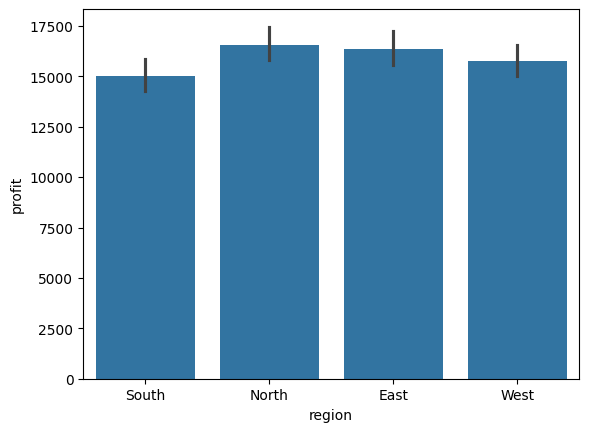

In [ ]:
sns.barplot(x='region', y='profit', data=data)

In [ ]:
data.groupby(['region'])['city'].count()

,city
region,
East,1256
North,1288
South,1215
West,1241


### 2) South Bangalore Avg_Profits



In [ ]:
import seaborn as sns

<Axes: xlabel='region', ylabel='profit'>

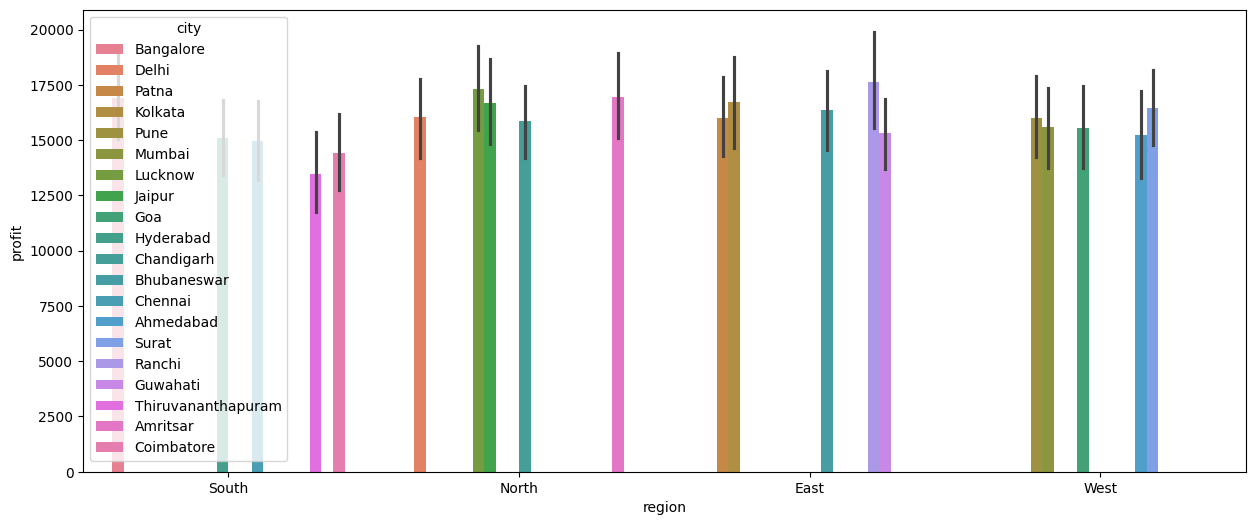

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'region', y='profit', data=data, hue='city')

### 3) Which Region Sold The Highest No. Of Books?

In [ ]:
data[data['category']== 'Books'].groupby(['region','category'])['quantity'].count()

,,quantity
region,category,
East,Books,128
North,Books,143
South,Books,121
West,Books,136


### 4) Which Sub-Category Has The Highest Average Discount?

In [ ]:
data.groupby(['sub-category'])['discount'].mean().sort_values(ascending=False).head(3)

,discount
sub-category,
Puzzle,11.329787
Shampoo,11.091954
Camera,10.957447


## 5) Region: South Category: Kitchen
### 1. Payment Mode Count 2. Total Sales 3. Total Profits 4. Quantity Sold

In [ ]:
df = data[ (data['region'] =='South') & (data['category'] == 'Kitchen') ]

In [ ]:
df.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode
61,10062,2024-04-09,Azad Kunda,South,Chennai,Kitchen,Cookware Set,Cookware Set Nisi,2,13751,15,23376.70,5552.74,Debit Card
163,10164,2024-06-21,Inaaya Tandon,South,Hyderabad,Kitchen,Juicer,Juicer Possimus,5,44801,15,190404.25,16507.93,UPI
186,10187,2024-08-03,Samiha Halder,South,Hyderabad,Kitchen,Cookware Set,Cookware Set Minima,2,8566,15,14562.20,2893.23,Credit Card
263,10264,2024-02-05,Drishya Mangal,South,Coimbatore,Kitchen,Juicer,Juicer Voluptate,4,39061,20,124995.20,30886.70,Credit Card
304,10305,2025-08-31,Vedika Shetty,South,Chennai,Kitchen,Cookware Set,Cookware Set Eligendi,4,18577,0,74308.00,9828.04,UPI


1. Payment Mode Count

In [ ]:
Payment_Mode_Count = df['payment mode'].value_counts()
print(Payment_Mode_Count)

payment mode
Net Banking    27
Debit Card     26
UPI            25
Credit Card    23
COD            23
Name: count, dtype: int64


2. Total Sales

In [ ]:
total_sales = df['sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 13399212.0


3. Total Profits

In [ ]:
total_profits = df['profit'].sum()
print("Total Profits:", total_profits)

Total Profits: 1954866.1400000004


4. Quantity Sold

In [ ]:
quantity_sold = df['quantity'].sum()
print("Quantity Sold:", quantity_sold)

Quantity Sold: 373


## 6) Which Category Has The Highest Profit Percentage In Region? (South, North)

In [ ]:
data = pd.read_csv('/data (2).csv')
data.columns = data.columns.str.lower()
df = data[(data['region'] == 'North') | (data['region'] == 'South')]

In [ ]:
df = data[data['region'].isin(['North', 'South'])]

In [ ]:
df.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
7,10008,2025-08-17,Misha Dua,North,Lucknow,Books,Biography,Biography Vel,1,15885,10,14296.5,1289.03,Debit Card
8,10009,2025-03-07,Arhaan Vala,North,Jaipur,Groceries,Spices,Spices Expedita,1,40834,20,32667.2,3700.89,Credit Card
10,10011,2025-08-24,Divyansh Thaman,North,Lucknow,Kitchen,Cookware Set,Cookware Set Doloremque,2,10761,20,17217.6,4139.82,Credit Card


In [ ]:
df['profit_percentage'] = df['profit'] / df['sales'] * 100

/tmp/ipython-input-2024276389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit_percentage'] = df['profit'] / df['sales'] * 100


In [ ]:
df.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode,profit_percentage
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,15.262911
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,18.675620
7,10008,2025-08-17,Misha Dua,North,Lucknow,Books,Biography,Biography Vel,1,15885,10,14296.5,1289.03,Debit Card,9.016403
8,10009,2025-03-07,Arhaan Vala,North,Jaipur,Groceries,Spices,Spices Expedita,1,40834,20,32667.2,3700.89,Credit Card,11.329070
10,10011,2025-08-24,Divyansh Thaman,North,Lucknow,Kitchen,Cookware Set,Cookware Set Doloremque,2,10761,20,17217.6,4139.82,Credit Card,24.044118


In [ ]:
df.groupby(['category'])['profit_percentage'].mean().sort_values(ascending=False)

,profit_percentage
category,
Electronics,15.504515
Toys,15.234720
Home Decor,15.046251
Kitchen,15.028310
Furniture,14.976600
Clothing,14.974555
Groceries,14.920975
Sports,14.847864
Books,14.424683


In [ ]:
data['profit_percentage'] = data['profit'] / data['sales'] * 100

In [ ]:
print(data.groupby(['region','category'])['profit_percentage'].mean())

region  category   
East    Beauty         14.818458
        Books          14.602503
        Clothing       15.846636
        Electronics    15.403052
        Furniture      14.764503
        Groceries      14.786294
        Home Decor     14.957937
        Kitchen        14.249116
        Sports         14.757169
        Toys           14.897199
North   Beauty         13.281567
        Books          13.892981
        Clothing       14.841311
        Electronics    16.228859
        Furniture      15.323202
        Groceries      15.049144
        Home Decor     14.943151
        Kitchen        15.177975
        Sports         14.846858
        Toys           14.893888
South   Beauty         15.058866
        Books          15.053059
        Clothing       15.099045
        Electronics    14.736460
        Furniture      14.586671
        Groceries      14.783030
        Home Decor     15.175344
        Kitchen        14.888302
        Sports         14.848951
        Toys           

In [ ]:
data.head()

,order id,order date,customer name,region,city,category,sub-category,product name,quantity,unit price,discount,sales,profit,payment mode,profit_percentage
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,15.262911
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,18.675620
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card,9.561640
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI,22.893273
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card,20.096329


In [ ]:
new_data = data[['region','city','category','sub-category','sales','profit','profit_percentage','unit price', 'discount','payment mode']]

In [ ]:
new_data.head()

,region,city,category,sub-category,sales,profit,profit_percentage,unit price,discount,payment mode
0,South,Bangalore,Books,Non-Fiction,68958.6,10525.09,15.262911,36294,5,Debit Card
1,North,Delhi,Groceries,Rice,33732.0,6299.66,18.675620,42165,20,Debit Card
2,East,Patna,Kitchen,Juicer,207603.2,19850.27,9.561640,64876,20,Credit Card
3,East,Kolkata,Groceries,Oil,158610.0,36311.02,22.893273,37320,15,UPI
4,West,Pune,Clothing,Kids Wear,45033.3,9050.04,20.096329,50037,10,Debit Card


## 7) Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical features
label_encoders = {}
categorical_cols = ['region', 'category', 'payment mode']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

/tmp/ipython-input-1606700601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-1606700601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-1606700601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
# Features & Target
X = df[['region', 'category', 'payment mode', 'quantity']]
y = df['sales']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 52382.58454668087
RMSE: 67237.81105726579
R2 Score: 0.307380434323549
